## Tianyi Zhang 9598110243

-----------

### 1. Vertebral Column Data Set

#### 1.a

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data  = pd.read_csv('./data/vertebral_column_data/column_2C.dat', sep="\s+", header = None, 
                    names = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'label'])

print(data.head(5))

   pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis label  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB  


#### 1.b

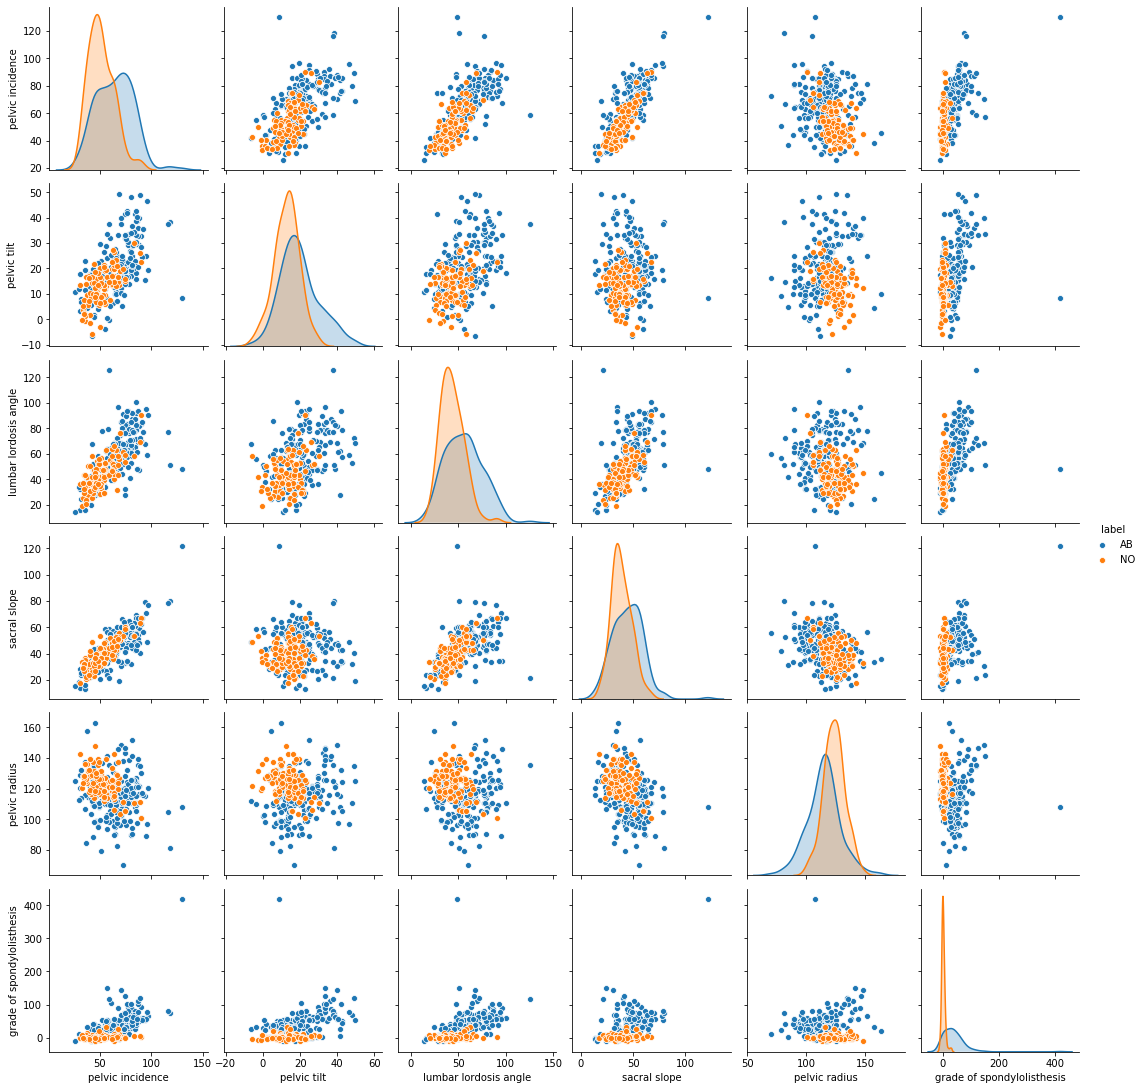

In [23]:
sns.pairplot(data=data, hue="label");

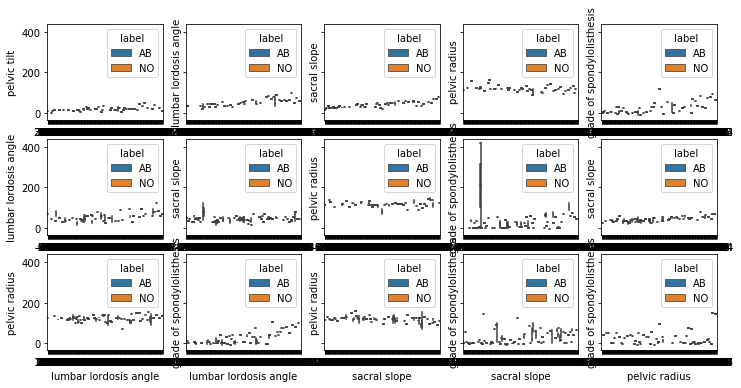

In [24]:
f, axes = plt.subplots(3, 5, sharey=True, figsize=(12, 6))

sns.boxplot(x='pelvic incidence', y='pelvic tilt', data=data, ax=axes[0][0], hue='label')
sns.boxplot(x='pelvic incidence', y='lumbar lordosis angle', data=data, ax=axes[0][1], hue='label')
sns.boxplot(x='pelvic incidence', y='sacral slope', data=data, ax=axes[0][2], hue='label')
sns.boxplot(x='pelvic incidence', y='pelvic radius', data=data, ax=axes[0][3], hue='label')
sns.boxplot(x='pelvic incidence', y='grade of spondylolisthesis', data=data, ax=axes[0][4], hue='label')
sns.boxplot(x='pelvic tilt', y='lumbar lordosis angle', data=data, ax=axes[1][0], hue='label')
sns.boxplot(x='pelvic tilt', y='sacral slope', data=data, ax=axes[1][1], hue='label')
sns.boxplot(x='pelvic tilt', y='pelvic radius', data=data, ax=axes[1][2], hue='label')
sns.boxplot(x='pelvic tilt', y='grade of spondylolisthesis', data=data, ax=axes[1][3], hue='label')
sns.boxplot(x='lumbar lordosis angle', y='sacral slope', data=data, ax=axes[1][4], hue='label')
sns.boxplot(x='lumbar lordosis angle', y='pelvic radius', data=data, ax=axes[2][0], hue='label')
sns.boxplot(x='lumbar lordosis angle', y='grade of spondylolisthesis', data=data, ax=axes[2][1], hue='label')
sns.boxplot(x='sacral slope', y='pelvic radius', data=data, ax=axes[2][2], hue='label')
sns.boxplot(x='sacral slope', y='grade of spondylolisthesis', data=data, ax=axes[2][3], hue='label')
sns.boxplot(x='pelvic radius', y='grade of spondylolisthesis', data=data, ax=axes[2][4], hue='label')

In [41]:
data1 = data[data.label == 'AB']
data0 = data[data.label == 'NO']

datatr = pd.concat([data1.iloc[:140,:], data0.iloc[:70,:]])
datate = pd.concat([data1.iloc[140:,:], data0.iloc[70:,:]])
# print(data1.iloc[:70,:])
print('dataset:', data.shape,'\ntraining set:', datatr.shape, '\ntest set:', datate.shape)

dataset: (310, 7) 
training set: (210, 7) 
test set: (100, 7)


#### 1.c

I use sklearn.neighbors.KNeighborsClassifier for k-nearest neighbors with Euclidean metric

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

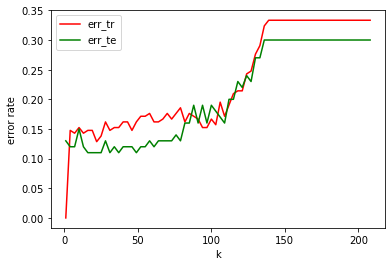

In [43]:
k = np.arange(208, 0, -3)
# print(k.shape)
err_tr = np.arange(70, dtype = np.float)
err_te = np.arange(70, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
plt.plot(k, err_tr, 'r', label = 'err_tr')
plt.plot(k, err_te, 'g', label = 'err_te')
plt.legend()
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

In [47]:
index = np.argmin(err_te)

K_star = k[index]
print('best test error:', np.min(err_te))
print('the best K:', K_star)

best test error: 0.10999999999999999
the best K: 49


In [48]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=K_star)
knn.fit(datatr.iloc[:,0:6], datatr['label'])
confusion_matrix = confusion_matrix(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
print(confusion_matrix)

[[124  18]
 [ 16  52]]


In [49]:
TP = confusion_matrix[0][0]
TN = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

true_positive_rate = TP/(TP+FN)
true_negative_rate = TN/(TN+FP)
pre = TP/(TP+FP)
F = 2*TP/(2*TP+FP+FN)
print('true_positive_rate:',true_positive_rate)
print('true_negative_rate:',true_negative_rate)
print('precision:',pre)
print('F score:', F)

true_positive_rate: 0.8857142857142857
true_negative_rate: 0.7428571428571429
precision: 0.8732394366197183
F score: 0.8794326241134752


#### 1.c learning curve

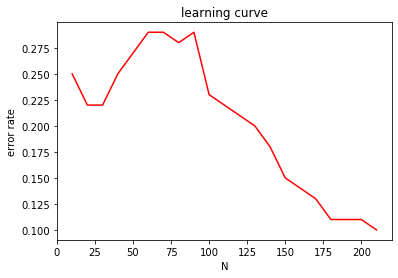

In [51]:
N = np.arange(10, 211, 10)
# print(N.shape)
datatr1 = datatr[datatr.label == 'AB']
datatr0 = datatr[datatr.label == 'NO']

error = np.arange(21, dtype = np.float)
m = 0
for i in N:
    data_tr = pd.concat([datatr1.iloc[:(i-int(i/3)),:], datatr0.iloc[:int(i/3),:]])
#     print(data_tr.shape)
    error_te = np.ones(42, dtype = np.float)
    
    k = np.arange(1, i, 5)
    l = 0
    for j in k:
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(data_tr.iloc[:,0:6], data_tr['label'])
        error_te[l] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
        l = l+1
#     index = np.argmin(error_te)
#     K_best = k[index]
    error[m] = np.min(error_te)
    m = m+1
# print(error)

plt.plot(N, error, 'r')
plt.xlabel('N')
plt.title('learning curve')
plt.ylabel('error rate')
plt.show()

### 1.d

#### i. Minkowski Distance(p = 1, Manhattan distance):

In [52]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best test error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best test error: 0.10999999999999999
best K: 11
best training error: 0.0


#### the best logP

In [53]:
logP = np.linspace(0.1, 1, 10)
# print(logP.shape)
err_tr = np.arange(10, dtype = np.float)
err_te = np.arange(10, dtype = np.float)
j = 0
for i in logP:
    knn = KNeighborsClassifier(n_neighbors=11, metric = 'minkowski', p=10**i)
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1

errMin = np.min(err_te)
index = np.argmin(err_te)
print('best error:', errMin)
print('the best log(P):', logP[index])


best error: 0.10999999999999999
the best log(P): 0.1


#### p infinite(Chebyshev distance)

In [54]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=float('inf'))
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best error: 0.10999999999999999
best K: 21
best training error: 0.0


#### ii. Mahalanobis Distance.5

In [55]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
#     print(test.shape)
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'mahalanobis', metric_params={'V': np.cov((datatr.iloc[:, :6]).T)})
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best error: 0.17000000000000004
best K: 1
best training error: 0.0


#### table(majority polling)

|             | Manhattan           | Chebyshev           | Mahalanobis         | euclidean |
| ----------- | ------------------- | ------------------- | ------------------- | --------- |
| best k      | 11                  | 21                  | 1                   | 49         |
| test error  | 0.10999999999999999 | 0.10999999999999999 | 0.17000000000000004 | 0.10999999999999999 |

#### 1.e 

Chebyshev distance

In [56]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance', metric = 'minkowski', p=float('inf'))
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best error: 0.10999999999999999
best K: 16
best training error: 0.0


Manhattan distance

In [57]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance', metric = 'minkowski', p=1)
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best error: 0.09999999999999998
best K: 26
best training error: 0.0


Euclidean distance

In [39]:
k = np.arange(1, 200, 5)
# print(k.shape)
err_tr = np.arange(40, dtype = np.float)
err_te = np.arange(40, dtype = np.float)
j = 0
# print(err_te)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance', metric = 'minkowski', p=2)
    knn.fit(datatr.iloc[:,0:6], datatr['label'])
    err_tr[j] = 1 - accuracy_score(knn.predict(datatr.iloc[:,0:6]),datatr.iloc[:,6])
    err_te[j] = 1 - accuracy_score(knn.predict(datate.iloc[:,0:6]),datate.iloc[:,6])
    j = j+1
# print(err_te)
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error:', errMin)
print('best K:', K_best)

errMin_tr = np.min(err_tr)
print('best training error:', errMin_tr)

best error: 0.09999999999999998
best K: 6
best training error: 0.0


#### table(weighted)

|             | Manhattan | Chebyshev | euclidean |
| ----------- | --------- | --------- | --------- |
| best k      | 26        | 16        | 6         |
| test error  | 0.09999999999999998 | 0.10999999999999999 | 0.09999999999999998 |

#### 1.f

the lowest traning error rate is 0, because we choose K value from 1. And when K is equal to 1, the training error rate will be 0.

In addition, the lowest test error rate is 0.09999999999999998, when I made weighted decision and used Manhattan distance or Euclidean distance.